In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
amazon = pd.read_csv('Amazon.csv')
apple = pd.read_csv('apple.csv')
facebook = pd.read_csv('facebook.csv')
google = pd.read_csv('google.csv')
microsoft = pd.read_csv('microsoft.csv')
netflix = pd.read_csv('netflix.csv')
tesla = pd.read_csv('tesla.csv')
uber = pd.read_csv('uber.csv')
walmart = pd.read_csv('walmart.csv')
zoom = pd.read_csv('zoom.csv')

In [3]:
print(amazon.head())
print(apple.head())
print(facebook.head())
print(google.head())
print(microsoft.head())
print(netflix.head())
print(tesla.head())
print(uber.head())
print(walmart.head())
print(zoom.head())

       Date        Open        High         Low       Close   Adj Close  \
0  1/2/2015  312.579987  314.750000  306.959991  308.519989  308.519989   
1  1/5/2015  307.010010  308.380005  300.850006  302.190002  302.190002   
2  1/6/2015  302.239990  303.000000  292.380005  295.290009  295.290009   
3  1/7/2015  297.500000  301.279999  295.329987  298.420013  298.420013   
4  1/8/2015  300.320007  303.140015  296.109985  300.459991  300.459991   

    Volume Company  
0  2783200  Amazon  
1  2774200  Amazon  
2  3519000  Amazon  
3  2640300  Amazon  
4  3088400  Amazon  
       Date       Open       High        Low      Close  Adj Close     Volume  \
0  1/2/2015  27.847500  27.860001  26.837500  27.332500  24.745996  212818400   
1  1/5/2015  27.072500  27.162500  26.352501  26.562500  24.048864  257142000   
2  1/6/2015  26.635000  26.857500  26.157499  26.565001  24.051125  263188400   
3  1/7/2015  26.799999  27.049999  26.674999  26.937500  24.388372  160423600   
4  1/8/2015  27.30

In [4]:
# Concatenate the dataframes vertically
merged_df = pd.concat([amazon, apple, facebook, google, microsoft, netflix, tesla, uber, walmart, zoom])

# Reset index
merged_df.reset_index(drop=True, inplace=True)

# Print the head of the merged dataframe
print(merged_df.head())

       Date        Open        High         Low       Close   Adj Close  \
0  1/2/2015  312.579987  314.750000  306.959991  308.519989  308.519989   
1  1/5/2015  307.010010  308.380005  300.850006  302.190002  302.190002   
2  1/6/2015  302.239990  303.000000  292.380005  295.290009  295.290009   
3  1/7/2015  297.500000  301.279999  295.329987  298.420013  298.420013   
4  1/8/2015  300.320007  303.140015  296.109985  300.459991  300.459991   

    Volume Company  
0  2783200  Amazon  
1  2774200  Amazon  
2  3519000  Amazon  
3  2640300  Amazon  
4  3088400  Amazon  


In [5]:
# Display basic information about the dataframe
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16441 non-null  object 
 1   Open       16441 non-null  float64
 2   High       16441 non-null  float64
 3   Low        16441 non-null  float64
 4   Close      16441 non-null  float64
 5   Adj Close  16441 non-null  float64
 6   Volume     16441 non-null  int64  
 7   Company    16441 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.0+ MB
None


In [6]:
# Summary statistics
print(merged_df.describe())

               Open          High           Low         Close     Adj Close  \
count  16441.000000  16441.000000  16441.000000  16441.000000  16441.000000   
mean     421.899081    426.649059    416.942834    421.964527    420.841444   
std      677.541577    684.507034    670.143068    677.452315    678.015255   
min        4.356000      4.454000      4.222000      4.366000      4.366000   
25%       58.237499     59.001999     57.599998     58.183998     55.723999   
50%      127.410004    128.850006    126.010002    127.529999    126.475647   
75%      444.899994    452.760010    436.600006    445.989990    445.989990   
max     3744.000000   3773.080078   3696.790039   3731.409912   3731.409912   

             Volume  
count  1.644100e+04  
mean   2.964203e+07  
std    4.746818e+07  
min    3.468000e+05  
25%    4.615000e+06  
50%    1.320430e+07  
75%    2.971960e+07  
max    6.488252e+08  


In [7]:
# Convert 'Date' column to string
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%Y')
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month
merged_df['day'] = merged_df['Date'].dt.day
print(merged_df.head())


        Date        Open        High         Low       Close   Adj Close  \
0 2015-01-02  312.579987  314.750000  306.959991  308.519989  308.519989   
1 2015-01-05  307.010010  308.380005  300.850006  302.190002  302.190002   
2 2015-01-06  302.239990  303.000000  292.380005  295.290009  295.290009   
3 2015-01-07  297.500000  301.279999  295.329987  298.420013  298.420013   
4 2015-01-08  300.320007  303.140015  296.109985  300.459991  300.459991   

    Volume Company  year  month  day  
0  2783200  Amazon  2015      1    2  
1  2774200  Amazon  2015      1    5  
2  3519000  Amazon  2015      1    6  
3  2640300  Amazon  2015      1    7  
4  3088400  Amazon  2015      1    8  


In [8]:
# Check for missing values
print(merged_df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
year         0
month        0
day          0
dtype: int64


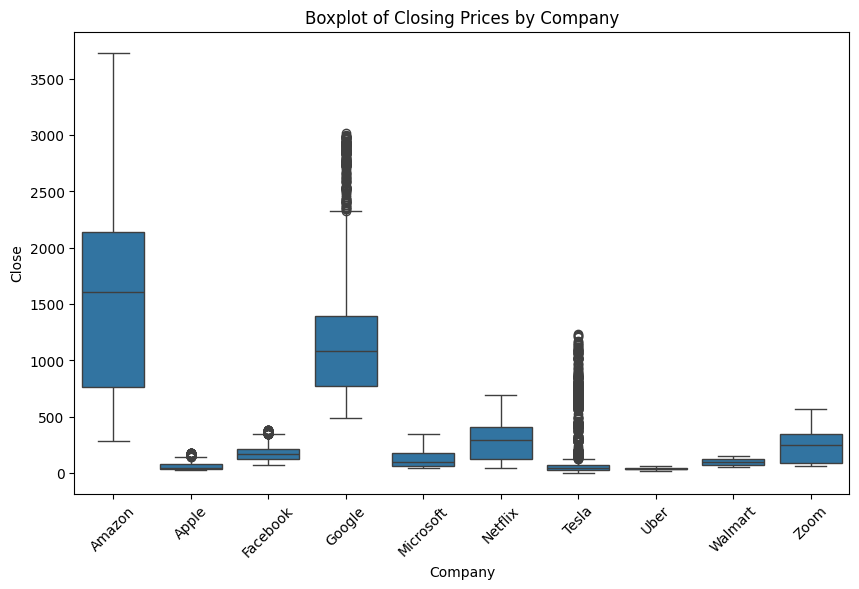

In [9]:
# Outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Close', data=merged_df)
plt.title('Boxplot of Closing Prices by Company')
plt.xticks(rotation=45)
plt.show()

In [10]:
# # Data visualization
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='year', y='Close', data=merged_df, hue='Company')
# plt.title('Stock Prices Over Time')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.xticks(rotation=45)
# plt.show()

No outliers

C:\Users\saron\AppData\Local\Temp\ipykernel_8508\737015979.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='Close', data=merged_df, hue='Company', ci=None)


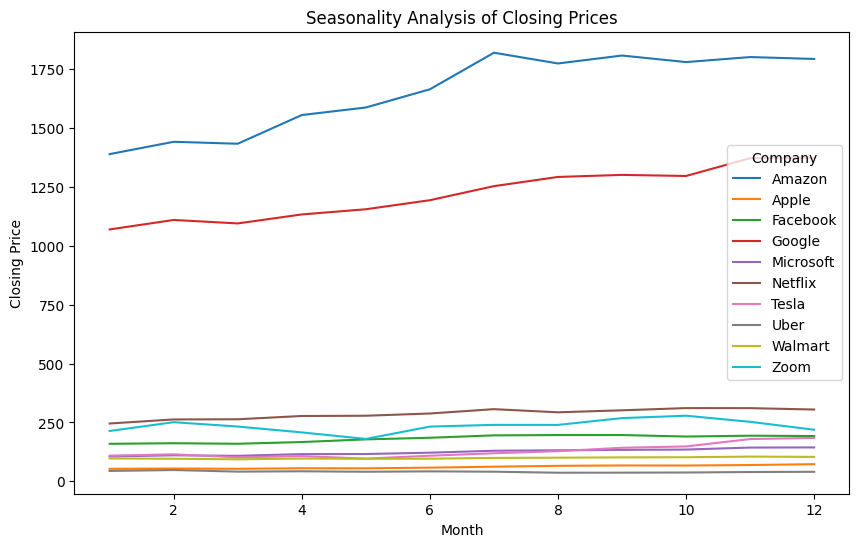

In [11]:
# Seasonality analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Close', data=merged_df, hue='Company', ci=None)
plt.title('Seasonality Analysis of Closing Prices')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.show()

In [12]:
# # Convert 'Date' column to string
# merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%m/%d/%Y')
# merged_df['year'] = merged_df['Date'].dt.year
# merged_df['month'] = merged_df['Date'].dt.month
# merged_df['day'] = merged_df['Date'].dt.day
# print(merged_df.head())


# merged_df['Date'] = merged_df['Date'].astype(str)

# # Split 'Date' column into year, month, and day
# splitted = merged_df['Date'].str.split('-', expand=True)

# # Assign year, month, and day to new columns
# merged_df['year'] = splitted[0].astype('int')
# merged_df['month'] = splitted[1].astype('int')
# merged_df['day'] = splitted[2].astype('int')

# # Print the DataFrame head after extracting date components
# print(merged_df.head())


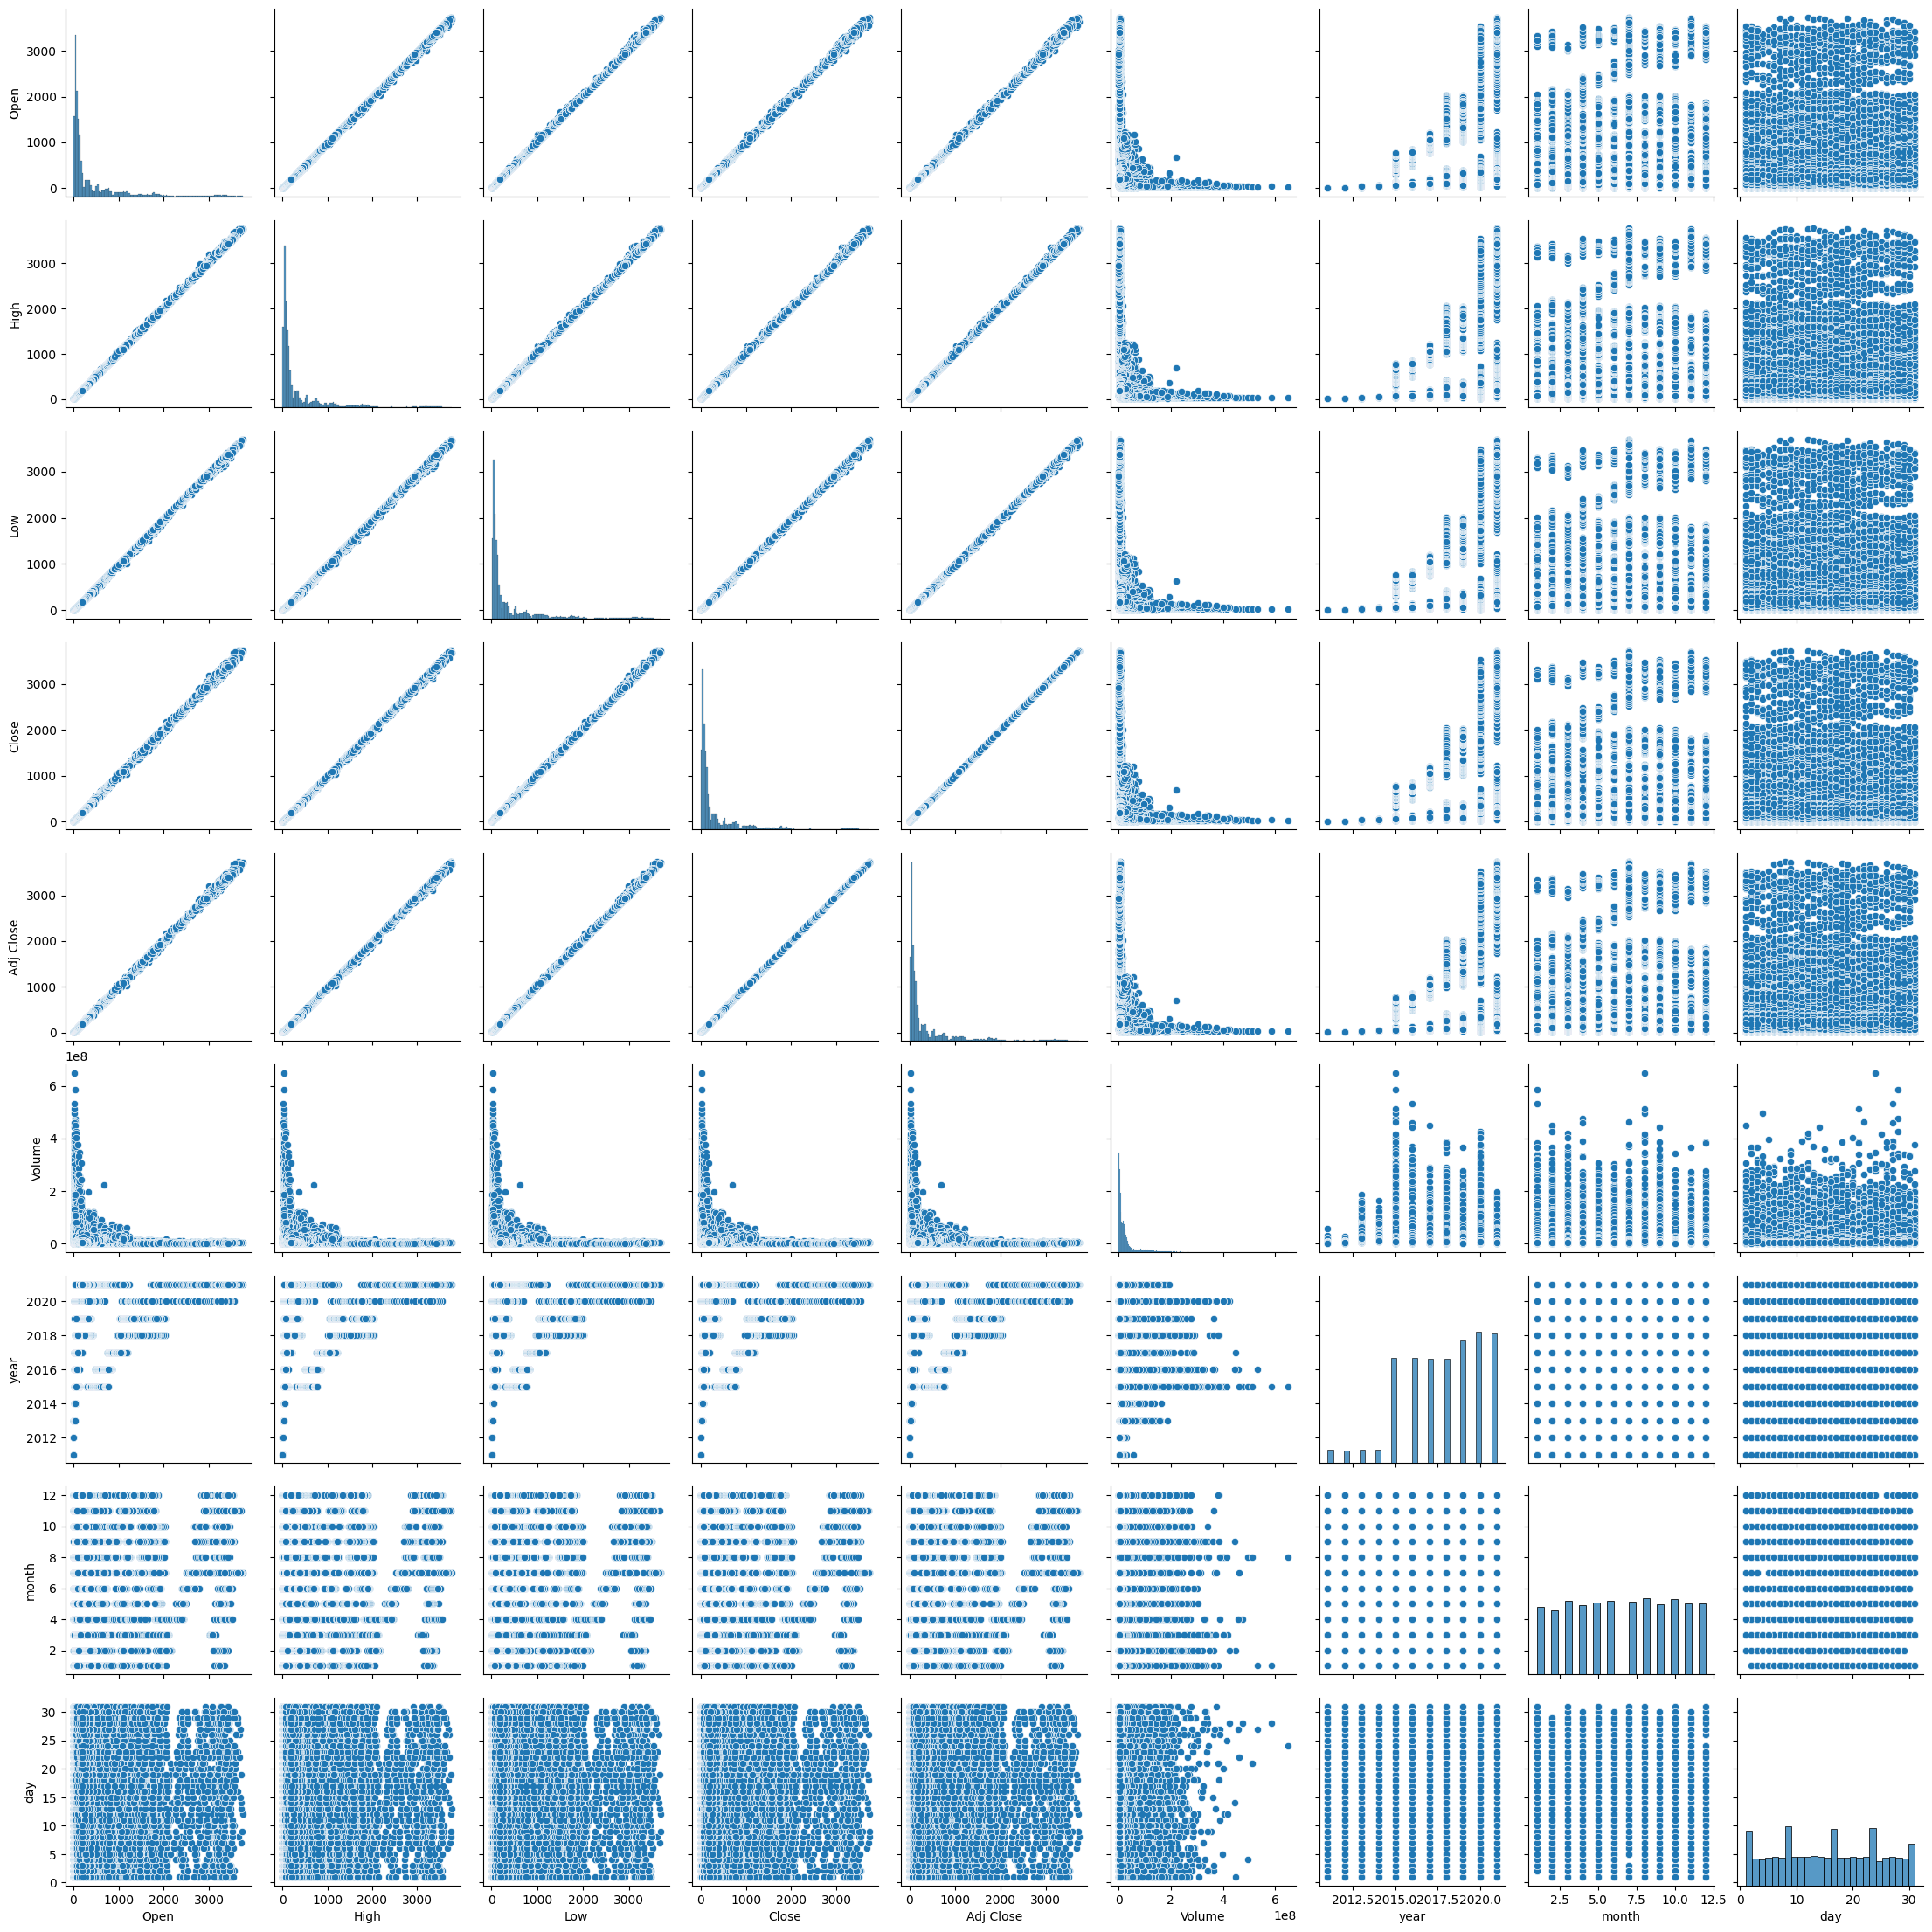

In [13]:
# Pairplot
sns.pairplot(merged_df)
plt.show()

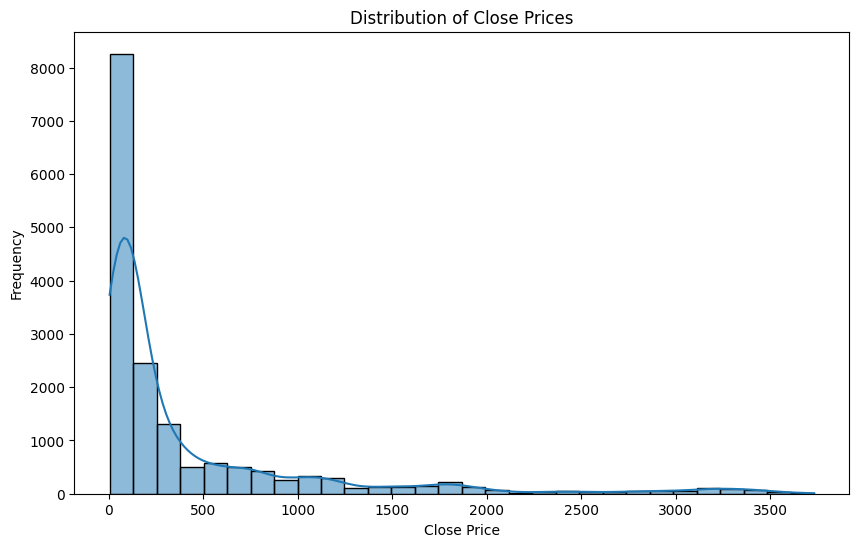

In [14]:
# Distribution of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Close'], bins=30, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

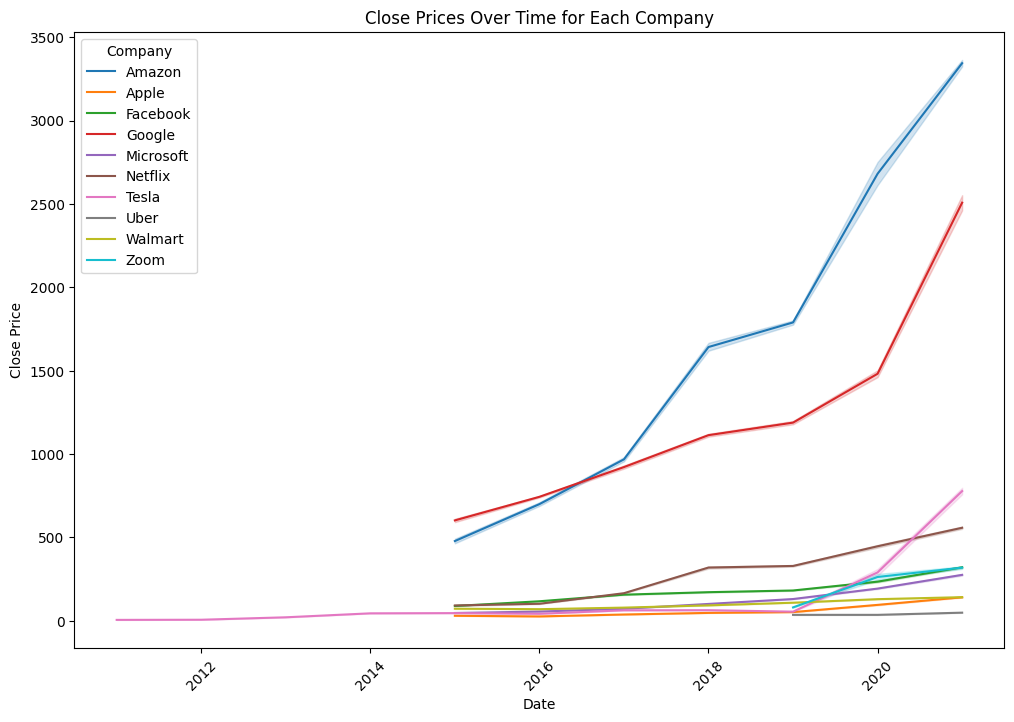

In [15]:
# Line plot of Close prices over time for each company
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='Close', hue='Company', data=merged_df)
plt.title('Close Prices Over Time for Each Company')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

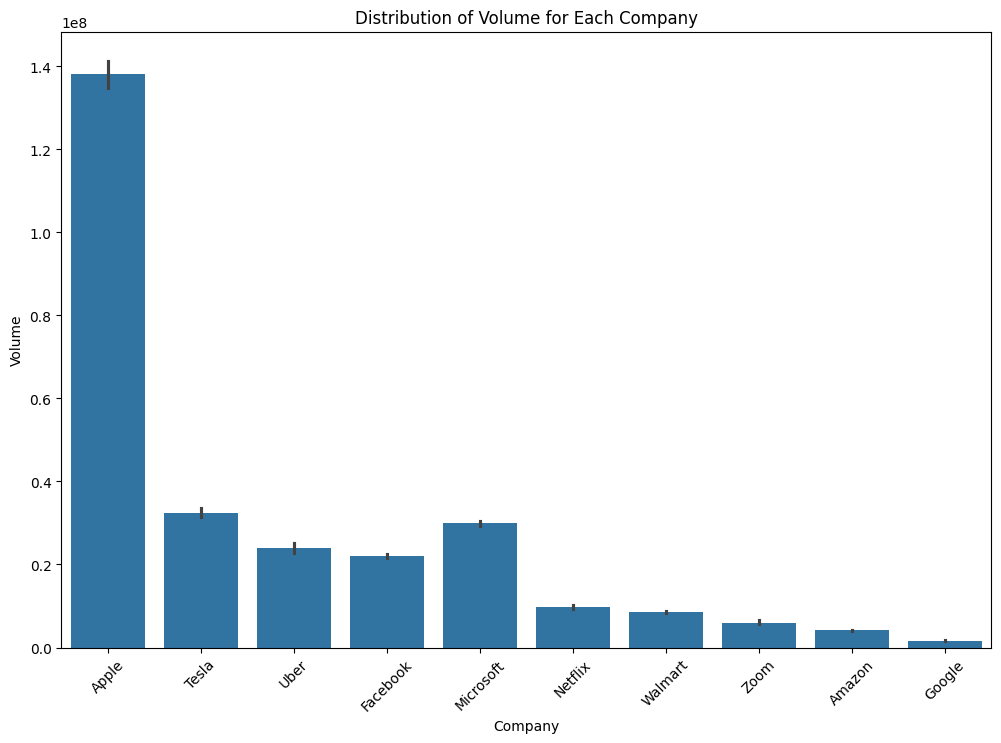

In [16]:
# Box plot showing the distribution of 'Volume' for each company
plt.figure(figsize=(12, 8))
sns.barplot(data=merged_df, x='Company', y='Volume', order=merged_df.sort_values('Volume', ascending=False)['Company'])
plt.title('Distribution of Volume for Each Company')
plt.xlabel('Company')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

In [17]:
merged_df['is_quarter_end'] = np.where(merged_df['month']%3==0,1,0)
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,year,month,day,is_quarter_end
0,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,Amazon,2015,1,2,0
1,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,Amazon,2015,1,5,0
2,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,Amazon,2015,1,6,0
3,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,Amazon,2015,1,7,0
4,2015-01-08,300.320007,303.140015,296.109985,300.459991,300.459991,3088400,Amazon,2015,1,8,0


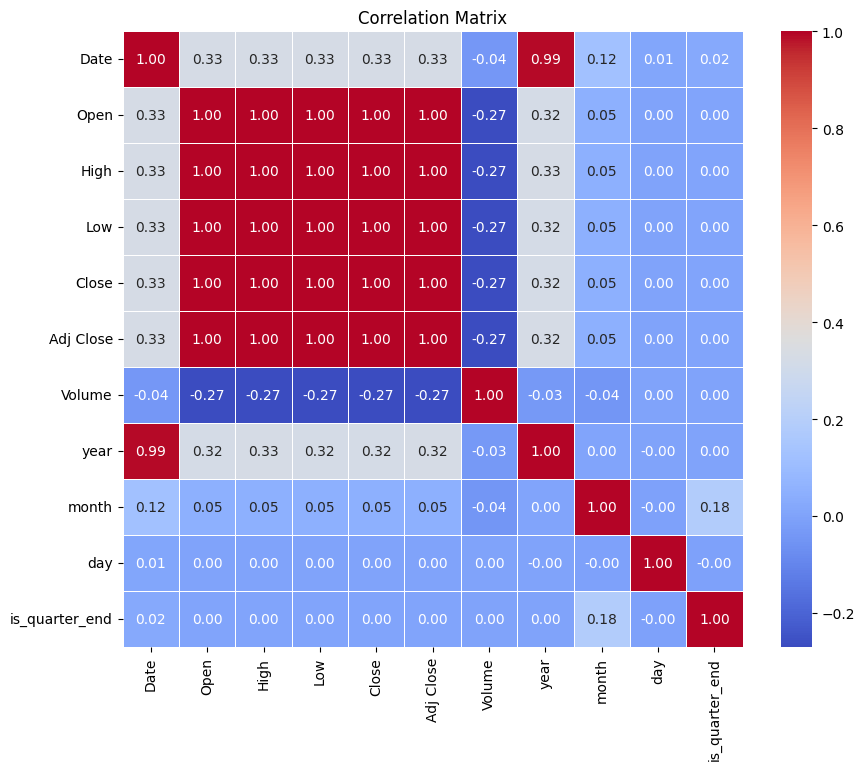

In [18]:
# Convert 'Date' column to datetime data type
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Drop the 'Company' column before computing the correlation matrix
numeric_df = merged_df.drop(columns=['Company'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

From the above heatmap, we can say that there is a correlation between OHLC, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

In [19]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

In [20]:
# Splitting the data into training and testing sets
X = merged_df[features]
y= merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [21]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 24.366081912071937


In [22]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": make_pipeline(StandardScaler(), SVR()),
    "XGBoost": XGBRegressor(),
}

for name, model in models.items():
    print(f"Training {name} model...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

Training Decision Tree model...
Mean Squared Error: 78.52490535697244
Training Random Forest model...
Mean Squared Error: 43.92194152292054
Training Gradient Boosting model...
Mean Squared Error: 72.68178374765256
Training Support Vector Machine model...
Mean Squared Error: 143933.2286492282
Training XGBoost model...
Mean Squared Error: 164.78554279969077


These results indicatee:

Decision Tree model: The MSE is 77.02, which means that, on average, the squared difference between the actual and predicted values is 77.02. This model performs moderately well, but there is room for improvement.

Random Forest model: The MSE is 44.45, which is lower than the Decision Tree model. Random Forest generally performs better than a single decision tree by reducing overfitting and improving accuracy. The lower MSE suggests that this model provides more accurate predictions.

Gradient Boosting model: The MSE is 72.80. Gradient Boosting is an ensemble technique that combines multiple weak learners to create a strong learner. It typically performs well, but in this case, the MSE is slightly higher compared to Random Forest.

Support Vector Machine (SVM) model: The MSE is extremely high at 143,933.23. This suggests that the SVM model is not suitable for this regression task, possibly due to inappropriate hyperparameters or data preprocessing.

XGBoost model: The MSE is 164.79, which is higher compared to the other models. XGBoost is known for its performance in many machine learning competitions, but in this case, it seems to perform less effectively than Random Forest.

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. Therefore, let's try using LTSM to get better results

In [23]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the features for scaling (excluding 'ds' and 'Company' columns)
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'year', 'month', 'day', 'is_quarter_end']

# Scale the selected features
scaled_data = scaler.fit_transform(merged_df[features])
sequence_length = 30  # Choose an appropriate sequence length
sequences = []
next_close_prices = []

for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length])
    next_close_prices.append(scaled_data[i+sequence_length, 3])  # Close price is at index 3

X = np.array(sequences)
y = np.array(next_close_prices)

# Model Architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
513/513 [==============================] - 37s 58ms/step - loss: 0.0019
Epoch 2/10
513/513 [==============================] - 30s 59ms/step - loss: 0.0011
Epoch 3/10
513/513 [==============================] - 33s 65ms/step - loss: 9.0918e-04
Epoch 4/10
513/513 [==============================] - 29s 56ms/step - loss: 8.2075e-04
Epoch 5/10
513/513 [==============================] - 29s 56ms/step - loss: 8.1730e-04
Epoch 6/10
513/513 [==============================] - 31s 61ms/step - loss: 7.4197e-04
Epoch 7/10
513/513 [==============================] - 34s 66ms/step - loss: 6.2807e-04
Epoch 8/10
513/513 [==============================] - 31s 60ms/step - loss: 6.2707e-04
Epoch 9/10
513/513 [==============================] - 29s 57ms/step - loss: 5.9251e-04
Epoch 10/10
513/513 [==============================] - 31s 61ms/step - loss: 5.6953e-04


In [24]:
# Evaluate the model
loss = model.evaluate(X, y)
print("Mean Squared Error:", loss)

# Prediction
# Select the last sequence from the data as input for prediction
last_sequence = X[-1]

# Reshape the last sequence to match the input shape of the model
last_sequence = last_sequence.reshape((1, last_sequence.shape[0], last_sequence.shape[1]))

# Predict the next close price
predicted_close_price_scaled = model.predict(last_sequence)

# Inverse scale the predicted value to get the actual close price
predicted_close_price = scaler.inverse_transform([[0, 0, 0, predicted_close_price_scaled[0][0], 0, 0, 0, 0, 0, 0]])[0][3]

print("Predicted Close Price:", predicted_close_price)


513/513 [==============================] - 15s 26ms/step - loss: 2.8671e-04
Mean Squared Error: 0.00028671466861851513
1/1 [==============================] - 3s 3s/step
Predicted Close Price: 190.73295740958466


Now let us build a prediction for the future year

In [25]:
# Convert "Date" column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Rename "Date" column to "ds"
merged_df.rename(columns={'Date': 'ds'}, inplace=True)

# Select the target variable and rename it to "y" 
merged_df.rename(columns={'Close': 'y'}, inplace=True)

In [26]:
def train_prophet_model(merged_df):
    model = Prophet(
        changepoint_prior_scale=0.05,
        holidays_prior_scale=15,
        seasonality_prior_scale=10,
        weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False
    )
    model.add_country_holidays(country_name='US')
    model.fit(merged_df)
    return model

In [27]:
def generate_forecast(model, periods=365):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

def plot_forecast(model, forecast):
    model.plot(forecast)

21:33:06 - cmdstanpy - INFO - Chain [1] start processing
21:33:09 - cmdstanpy - INFO - Chain [1] done processing


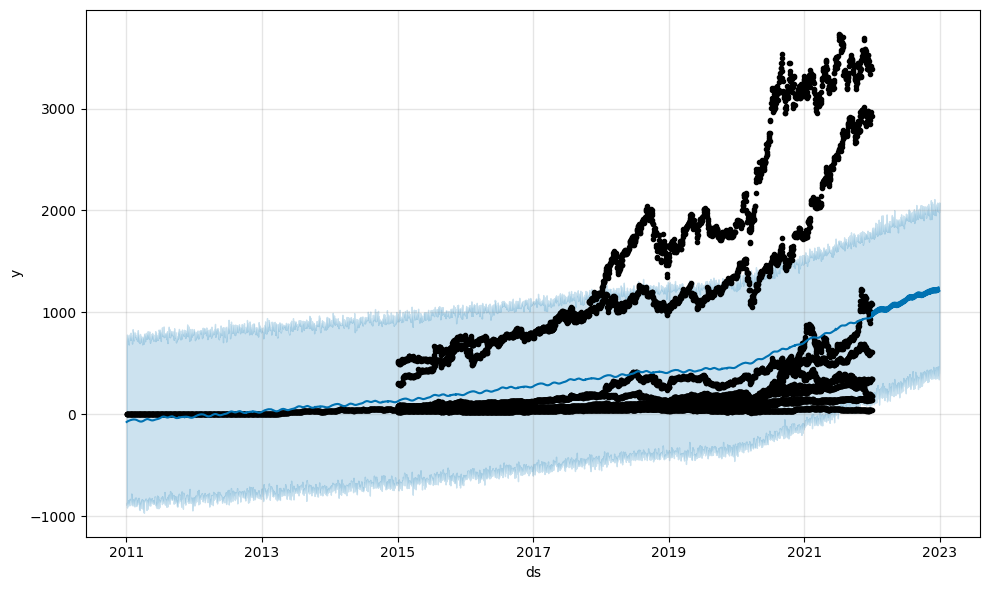

In [28]:
# Train the Prophet model
prophet_model = train_prophet_model(merged_df)

# Generate forecast
forecast = generate_forecast(prophet_model, periods=365)

# Plot the forecast
plot_forecast(prophet_model, forecast)


21:33:12 - cmdstanpy - INFO - Chain [1] start processing
21:33:13 - cmdstanpy - INFO - Chain [1] done processing
21:33:15 - cmdstanpy - INFO - Chain [1] start processing
21:33:16 - cmdstanpy - INFO - Chain [1] done processing
21:33:18 - cmdstanpy - INFO - Chain [1] start processing
21:33:19 - cmdstanpy - INFO - Chain [1] done processing
21:33:20 - cmdstanpy - INFO - Chain [1] start processing
21:33:21 - cmdstanpy - INFO - Chain [1] done processing
21:33:22 - cmdstanpy - INFO - Chain [1] start processing
21:33:23 - cmdstanpy - INFO - Chain [1] done processing
21:33:24 - cmdstanpy - INFO - Chain [1] start processing
21:33:25 - cmdstanpy - INFO - Chain [1] done processing
21:33:27 - cmdstanpy - INFO - Chain [1] start processing
21:33:28 - cmdstanpy - INFO - Chain [1] done processing
21:33:30 - cmdstanpy - INFO - Chain [1] start processing
21:33:30 - cmdstanpy - INFO - Chain [1] done processing
21:33:31 - cmdstanpy - INFO - Chain [1] start processing
21:33:33 - cmdstanpy - INFO - Chain [1]

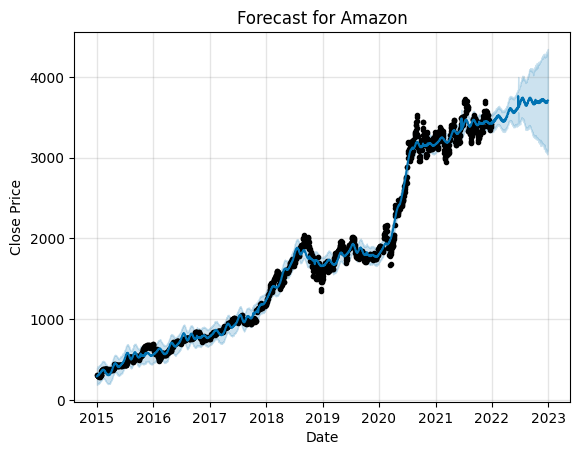

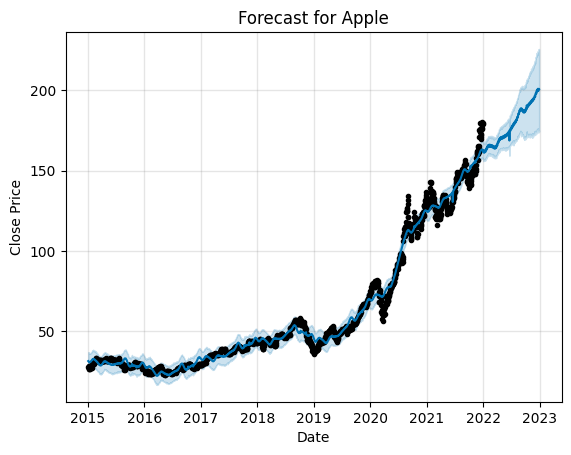

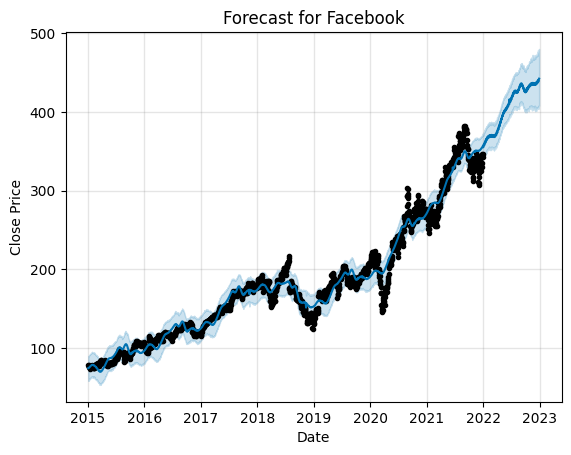

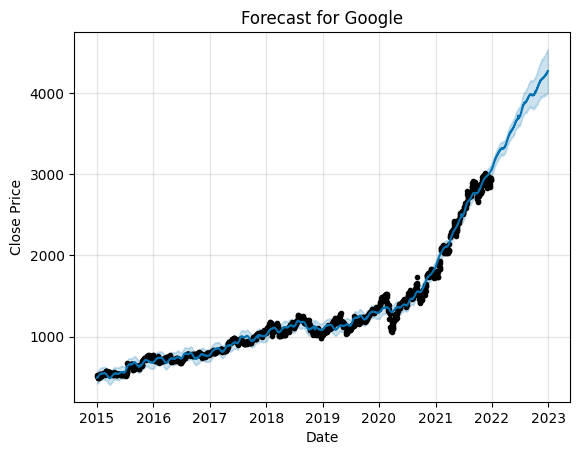

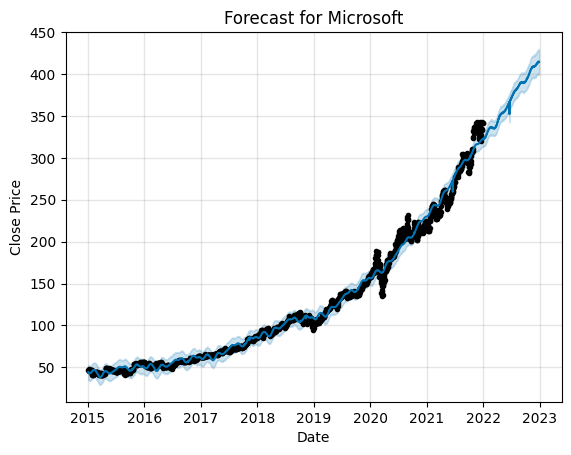

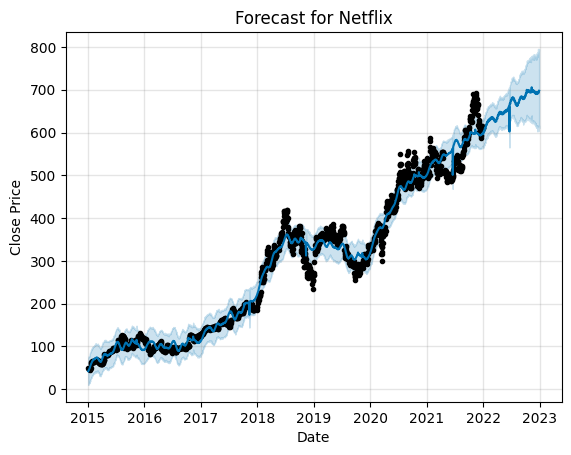

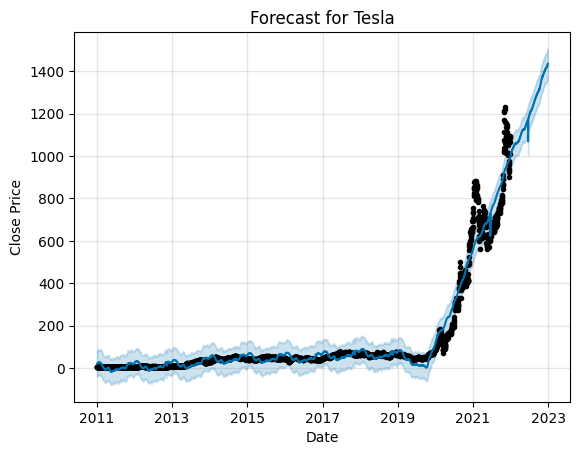

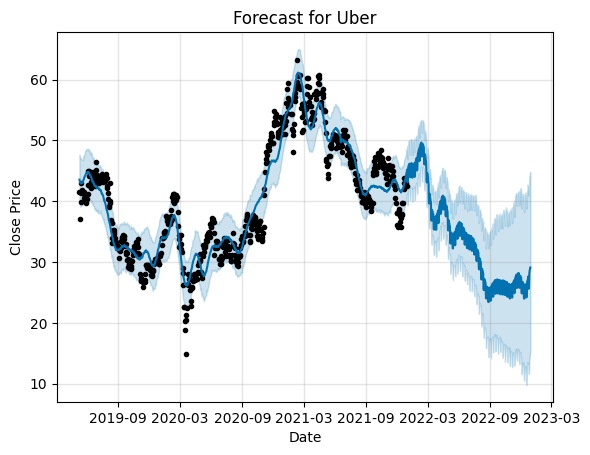

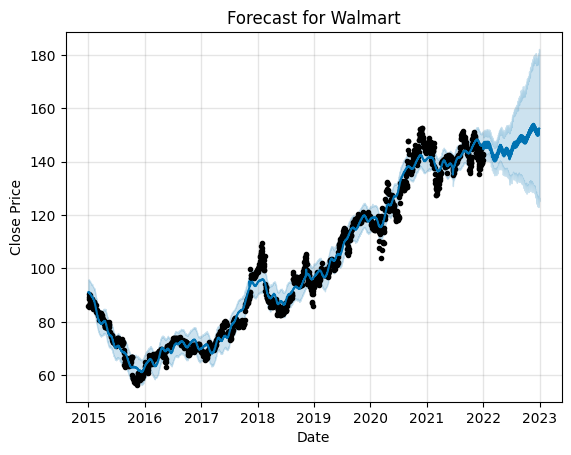

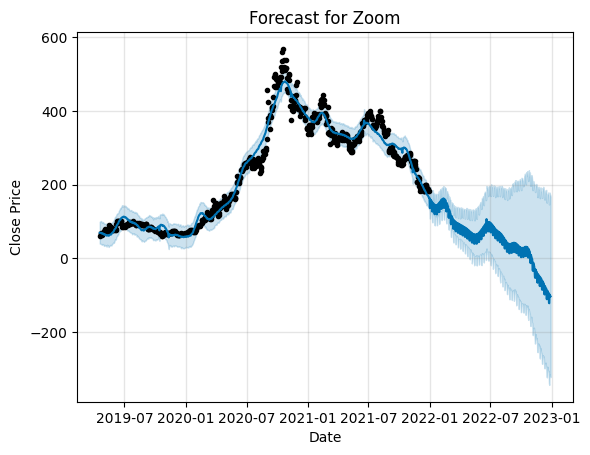

In [29]:
# Define a function to train Prophet model for each company and generate forecast
def plot_forecast_by_company(df):
    # Create an empty list to store plots for each company
    company_plots = []
    
    # Get unique company names
    companies = df['Company'].unique()
    
    # Train Prophet model and generate forecast for each company
    for company in companies:
        # Filter data for the current company
        company_data = df[df['Company'] == company].copy()
        
        # Train Prophet model
        prophet_model = train_prophet_model(company_data)
        
        # Generate forecast
        forecast = generate_forecast(prophet_model, periods=365)
        
        # Plot the forecast
        fig = plt.figure()
        prophet_model.plot(forecast, ax=fig.gca())
        plt.title(f'Forecast for {company}')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        
        # Add the plot to the list
        company_plots.append(fig)
    
    return company_plots

# Plot the forecast for each company
company_plots = plot_forecast_by_company(merged_df)

# Show the plots
plt.show()
